## Need for Pipelines

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Ames housing data

In [ ]:
ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


What does the following code do?

In [ ]:
lr = LinearRegression()

X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_s = (X_train - X_train.mean())/X_train.std()

lr_fitted = lr.fit(X_train_s, y_train)
lr_fitted.coef_

array([ 70621.86245571, -19068.88620199])

Now predict on test data

In [ ]:
y_preds = lr_fitted.predict(X_test)

r2_score(y_test, y_preds)

-1902273.6162139715

In [ ]:
X_test_p = X_test

X_test_p["y_pred"] = y_preds

X_test_p.iloc[0:6][["Gr Liv Area", "TotRms AbvGrd", "y_pred"]]

,Gr Liv Area,TotRms AbvGrd,y_pred
402,987,5,6.978846e+07
1979,1047,6,7.400670e+07
2699,1921,8,1.356921e+08
2302,816,4,5.773119e+07
906,1520,6,1.074108e+08
566,1224,4,8.654491e+07


**Check in.** Why are $R^2$ and predicted values so bad for the test data???

Predict for new house

In [ ]:
new_house = pd.DataFrame(data = {"Gr Liv Area": [889], "TotRms AbvGrd": [6]})
new_house

,Gr Liv Area,TotRms AbvGrd
0,889,6


In [ ]:
new_house_s = (new_house - new_house.mean())/new_house.std()
new_house_s

,Gr Liv Area,TotRms AbvGrd
0,NaN,NaN


**Check in.** What's going wrong? How can we fix it?

In [ ]:
X_test_s = (X_test - X_train.mean()) / X_train.std()
y_preds = lr_fitted.predict(X_test_s)

r2_score(y_test, y_preds)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- y_pred


In [ ]:
X_test_p = X_test

X_test_p["y_pred"] = y_preds

X_test_p.iloc[0:6][["Gr Liv Area", "TotRms AbvGrd", "y_pred"]]

,Gr Liv Area,TotRms AbvGrd,y_pred
2227,1020,4,7.265176e+07
1553,733,4,5.224198e+07
1330,1738,6,1.236788e+08
953,1217,6,8.662831e+07
2759,1590,6,1.131539e+08
2234,1601,6,1.139362e+08


In [ ]:
X_train.describe()

,Gr Liv Area,TotRms AbvGrd
count,2197.000000,2197.000000
mean,1501.056441,6.443787
std,503.743564,1.571940
min,334.000000,2.000000
25%,1140.000000,5.000000
50%,1441.000000,6.000000
75%,1750.000000,7.000000
max,5642.000000,15.000000


In [ ]:
new_house_s = (new_house - X_train.mean()) / X_train.std()
lr_fitted.predict(new_house_s)

array([100543.33044234])

## Pipelines

We have to be careful to transform the training data and the test data in exactly the same way before fitting a model. Most machine learning models have many more preprocessing steps. As the preprocessing gets more complex, it is easy to accidentally omit one of the preprocessing steps. For this reason, scikit-learn provides a _Pipeline_ object, which simply chains together a sequence of preprocessing and model building steps. If we call `Pipeline.fit()` or `Pipeline.predict()` on the data, all of the steps will be applied to the data in a consistent manner.

In [ ]:
lr_pipeline = Pipeline(
  [StandardScaler(),
  LinearRegression()]
)

lr_pipeline

TypeError: cannot unpack non-iterable LinearRegression object

TypeError: cannot unpack non-iterable LinearRegression object

Pipeline(steps=[StandardScaler(), LinearRegression()])

In [ ]:
from sklearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

lr_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
lr_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds = lr_pipeline_fitted.predict(X_test)
r2_score(y_test, y_preds)

0.5311263840651872

In [ ]:
lr_pipeline_fitted.predict(new_house)

array([100032.1635167])

## Mixing Quantitative and Categorical Predictors

In general, we want to fit machine learning models that use a mix of both categorical and quantitative predictors. In this situation, we will want to apply the `OneHotEncoder` to only the categorical predictors. Scikit-learn provides a `ColumnTransformer` that allows us to selectively apply transformations to certain columns.

For example, suppose we want to fit a linear regression model to predict house price from quantitative predictors (square footage, number of rooms) and categorical predictors (e.g., building type). We can use a `ColumnTransformer` to one-hot encode the categorical predictors, standardize the quantitative predictors, and drop the other variables we're not including in the model (`remainder = "drop"`). (There are other options; e.g., you can `passthrough` columns you want to include but don't want to transform.)

In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
)

ct


ColumnTransformer(transformers=[('dummify', OneHotEncoder(sparse_output=False),
                                 ['Bldg Type']),
                                ('standardize', StandardScaler(),
                                 ['Gr Liv Area', 'TotRms AbvGrd'])])

In [ ]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Bldg Type']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames.drop("SalePrice", axis = 1)
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

In [ ]:
ct_fitted = ct.fit(X_train)

ct.transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.92070518, -0.90542293],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.84847283,  0.36280415],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.62633389,  0.36280415],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.37329136,  0.36280415],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.08768414, -0.27130939],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.75289567,  0.36280415]])

In [ ]:
ct.transform(X_test)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.03809956, -0.27130939],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.03214941,  0.36280415],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.56766293, -0.27130939],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.37329136, -0.27130939],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.15428863,  0.36280415],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.83938646, -0.27130939]])

In [ ]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


ct.fit_transform(X_train)

,dummify__Bldg Type_1Fam,dummify__Bldg Type_2fmCon,dummify__Bldg Type_Duplex,dummify__Bldg Type_Twnhs,dummify__Bldg Type_TwnhsE,standardize__Gr Liv Area,standardize__TotRms AbvGrd
1542,0.0,0.0,0.0,1.0,0.0,-0.920705,-0.905423
2447,1.0,0.0,0.0,0.0,0.0,0.848473,0.362804
1184,1.0,0.0,0.0,0.0,0.0,0.626334,0.362804
1240,1.0,0.0,0.0,0.0,0.0,0.146355,-0.905423
1157,1.0,0.0,0.0,0.0,0.0,2.353861,1.631031
...,...,...,...,...,...,...,...
2481,0.0,0.0,0.0,0.0,1.0,-0.553779,-0.905423
1878,0.0,0.0,1.0,0.0,0.0,0.459730,2.265145
921,1.0,0.0,0.0,0.0,0.0,-0.373291,0.362804
2049,1.0,0.0,0.0,0.0,0.0,-0.087684,-0.271309


In [ ]:
lr_pipeline_fitted.named_steps['linear_regression'].coef_

array([ 70579.663432  , -19207.98023081])

## Interactions

In [ ]:
ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_inter.fit_transform(X_train)

,interaction__1,interaction__Gr Liv Area,interaction__TotRms AbvGrd,interaction__Gr Liv Area TotRms AbvGrd
126,1.0,1078.0,5.0,5390.0
303,1.0,1107.0,5.0,5535.0
374,1.0,2050.0,8.0,16400.0
2776,1.0,1749.0,7.0,12243.0
423,1.0,2402.0,10.0,24020.0
...,...,...,...,...
310,1.0,1285.0,6.0,7710.0
2703,1.0,879.0,4.0,3516.0
2174,1.0,1044.0,7.0,7308.0
19,1.0,2073.0,7.0,14511.0


In [ ]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"])],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["remainder__TotRms AbvGrd", "dummify__Bldg Type_1Fam"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X_train_dummified = ct_dummies.fit_transform(X_train)
X_train_dummified

,dummify__Bldg Type_1Fam,dummify__Bldg Type_2fmCon,dummify__Bldg Type_Duplex,dummify__Bldg Type_Twnhs,dummify__Bldg Type_TwnhsE,remainder__Order,remainder__PID,remainder__MS SubClass,remainder__MS Zoning,remainder__Lot Frontage,...,remainder__Screen Porch,remainder__Pool Area,remainder__Pool QC,remainder__Fence,remainder__Misc Feature,remainder__Misc Val,remainder__Mo Sold,remainder__Yr Sold,remainder__Sale Type,remainder__Sale Condition
126,1.0,0.0,0.0,0.0,0.0,127,534430080,20,RL,68.0,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
303,1.0,0.0,0.0,0.0,0.0,304,910205120,50,RM,50.0,...,200,0,NaN,MnPrv,NaN,0,4,2010,COD,Normal
374,1.0,0.0,0.0,0.0,0.0,375,527352150,60,RL,NaN,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Abnorml
2776,1.0,0.0,0.0,0.0,0.0,2777,907181090,60,RL,68.0,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
423,1.0,0.0,0.0,0.0,0.0,424,528106020,20,RL,105.0,...,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1.0,0.0,0.0,0.0,0.0,311,914475090,80,RL,74.0,...,0,0,NaN,GdPrv,Shed,80,5,2010,WD,Normal
2703,1.0,0.0,0.0,0.0,0.0,2704,904302020,30,RL,50.0,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal
2174,1.0,0.0,0.0,0.0,0.0,2175,908152060,80,RL,65.0,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
19,1.0,0.0,0.0,0.0,0.0,20,527302110,20,RL,85.0,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal


In [ ]:
ct_inter.fit_transform(X_train_dummified)

,interaction__1,interaction__remainder__TotRms AbvGrd,interaction__dummify__Bldg Type_1Fam,interaction__remainder__TotRms AbvGrd dummify__Bldg Type_1Fam
126,1.0,5.0,1.0,5.0
303,1.0,5.0,1.0,5.0
374,1.0,8.0,1.0,8.0
2776,1.0,7.0,1.0,7.0
423,1.0,10.0,1.0,10.0
...,...,...,...,...
310,1.0,6.0,1.0,6.0
2703,1.0,4.0,1.0,4.0
2174,1.0,7.0,1.0,7.0
19,1.0,7.0,1.0,7.0


## Validation Error

To estimate the test error, we split the training data into a _training set_ and a _validation set_. First, the model is fit to just the data in the training set. Then, the model is evaluated based on its predictions on the validation set. Because the model did not train on any of the labels in the validation set, the validation set essentially plays the role of the test data, even though it was carved out of the training data.

The prediction error on the validation set is known as the _validation error_. The validation error is an approximation to the test error.

In [ ]:
from sklearn.model_selection import train_test_split

X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Here is the training set.

In [ ]:
X_train

,Gr Liv Area,TotRms AbvGrd
410,1456,7
1304,901,4
1917,1008,6
1298,1080,5
286,1647,6
...,...,...
973,988,5
1306,3493,10
1956,924,6
1722,1577,6


In [ ]:
y_train

,SalePrice
410,148500
1304,107900
1917,131000
1298,95000
286,128000
...,...
973,91000
1306,295000
1956,122900
1722,280000


Here is the validation set

In [ ]:
X_test

,Gr Liv Area,TotRms AbvGrd
1313,2058,8
2566,1246,6
1891,1042,5
2242,1991,9
2470,1142,5
...,...,...
2918,1092,5
1165,1501,6
1346,1902,7
2177,1125,5


In [ ]:
y_test

,SalePrice
1313,129500
2566,172000
1891,161000
2242,119600
2470,139500
...,...
2918,79500
1165,179400
1346,123500
2177,155000


In [ ]:
X_test.describe()

,Gr Liv Area,TotRms AbvGrd
count,1465.000000,1465.000000
mean,1487.722184,6.427304
std,509.123962,1.561689
min,520.000000,3.000000
25%,1114.000000,5.000000
50%,1425.000000,6.000000
75%,1734.000000,7.000000
max,5642.000000,15.000000


Now let's look at the simple linear model again. First we fit the model using the training set

In [ ]:
lr_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)


In [ ]:
lr_pipeline_fitted.named_steps['linear_regression'].coef_, lr_pipeline_fitted.named_steps['linear_regression'].intercept_

(array([ 76821.41335703, -22621.58531188]), np.float64(181357.69965870306))

Now we apply it to the validation (test) set to get predictions.

In [ ]:
y_test_ = lr_pipeline.predict(X_test)

In [ ]:
y_test_

array([243022.12869161, 147220.99873389, 130258.22584659, ...,
       233410.91036072, 142970.28893372, 142932.59190932])

Now we calculate the validation (test) RMSE using the validation (test) set

In [ ]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, y_test_)
mse1

3462545770.2893662

## Cross Validation

The validation error above was calculated using only 50% of the training data, since we split the training data in half to create the validation set. As a result, the estimate is noisy.

There is a cheap way to obtain a second opinion about how well our model will do on future data. Previously, we split our data at random into two halves, fitting the model to the first half and evaluating it on the second half. Because the model has not already seen the second half of the data, this approximates how well the model would perform on future data.

But the way we split our data was arbitrary. We might as well swap the roles of the two halves, fitting the model to the _second_ half and evaluating it on the _first_ half. As long as the model is always evaluated on data that is different from the data that was used to train it, we have a valid estimate of test error. A schematic of this approach, known as **cross-validation**, is shown below.

![](https://github.com/dlsun/pods/blob/master/05-Regression-Models/cross-validation.png?raw=1)

Below we perform the same process as above but with the roles of the train and test set reversed.

In [ ]:
lr_pipeline_fitted_2 = lr_pipeline.fit(X_test, y_test)

In [ ]:
lr_pipeline_fitted_2.named_steps['linear_regression'].coef_, lr_pipeline_fitted_2.named_steps['linear_regression'].intercept_

(array([ 70751.48852664, -18879.61665851]), np.float64(179425.39453924916))

In [ ]:
y_train_ = lr_pipeline.predict(X_train)

In [ ]:
mse2 = mean_squared_error(y_train, y_train_)
mse2

3214161083.635588

Now we have two, somewhat independent estimates of the test error, which could be quite different. It is common to average the two numbers to obtain an overall estimate of the test error, called the **cross-validation estimate of test error**. Notice that the cross-validation estimate uses each observation in the data exactly once. We make a prediction for each observation, but always using a model that was trained on data that does not include that observation.

In [ ]:
mse = (mse1 + mse2) / 2
mse

3105645110.932412

In [ ]:
np.sqrt(mse)

np.float64(55728.31516323109)

## Cross-Validation in scikit-learn

As you know by now, scikit-learn provides functions that automate routine tasks of machine learning. For cross-validation, there is a function, `cross_val_score`, that takes in a model (or pipeline), the training data, and a scoring function, and carries out all aspects of cross-validation, including

1. splitting the training data into training and validation sets
2. fitting the model (pipeline) to each training set (including any prepocessing steps)
3. calculating the model's predictions on the corresponding validation set
4. calculating the score of the predictions on each validation set.

In [ ]:
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

In [ ]:
lr_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_pipeline,
                         X=X,
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=2)
scores

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", l

array([-1.64162315e+09,             nan])

First, notice that there are 2 scores. This is because scikit-learn calculated a score from each half of the data when that half served as the validation set.

Second, observe that the scores are negative. This is because scikit-learn requires that a "score" be something that ought to be maximized. Since we want to minimize the mean-squared error, we want to maximize the *negative* mean-squared error. Therefore, the scores that are reported here are the negative of the MSE.


In [ ]:
-scores.mean()

np.float64(3118588697.189556)

In [ ]:
np.sqrt(-scores.mean())

np.float64(55844.325559447454)

Note that this is not the same estimate of test error we got from scratch. The difference is due to the random splitting of the data into training and validation sets.

## $K$-Fold Cross Validation

One problem with splitting the training data into two halves is that the model is now trained on only half the amount of data. This model will likely perform worse than the actual model, which is trained on all of the training data. So the cross-validation estimate of test error is unnecessarily pessimistic.

We would like the size of the training set to be closer to the size of the original training data. We can do this by splitting the data into more than two subsamples. In general, we can split the data into $K$ subsamples, alternately training the data on $K-1$ subsamples and evaluating the model on the $1$ remaining subsample, i.e., the validation set. This way, we use $100(1 − 1/K)$ percent of the data for training in each of the "folds". This produces $K$ somewhat independent estimates of the test error. This procedure is known as **$K$-fold cross validation**. (Be careful not to confuse this $K$ with the $k$ in $k$-nearest neighbors.) In hindsight, the  cross validation that we were doing previously is $2$-fold cross validation.

A schematic of $4$-fold cross validation is shown below.

![](https://github.com/dlsun/pods/blob/master/05-Regression-Models/k-folds.png?raw=1)

Implementing $K$-fold cross validation in scikit-learn is easy. We simply set the `cv=` parameter to the desired number of folds. For example, the following code carries out $4$-fold cross validation.

In [ ]:
scores = cross_val_score(lr_pipeline,
                         X=X,
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=4)
scores

array([-3.40933309e+09, -2.69745168e+09, -3.82979321e+09, -2.62423005e+09])

Notice that $K$ scores are produced&mdash;4 in this case&mdash;one from each fold. These scores can be averaged to produce a single estimate of the test error.

In [ ]:
np.sqrt(-scores.mean())

np.float64(56037.50535324145)

How many folds to use in cross validation? In practice, 5-fold and 10-fold cross-validation are commonly used, and this is primarily what we'll do.

Another common choice is to set $K$ equal to $n$, the number of observations in the training data, resulting in **leave one out (LOO)** cross validation.

When choosing the number of folds there is a bias-variability tradeoff. Fewer folds introduces more bias, since in each fold only a subset of the data is used to fit the model (e.g., only half the data when $K=2$), and models fit on less data tend to perform less well and tend to overestimate the test error rate. With many folds&mdash;such as LOO at the extreme&mdash;there is less bias in estimating the test error because the training set within each fold is roughly the same size as the training data.


However, more folds leads to more variability in estimates of test error. With many folds, the training set is roughly the same across the folds resulting in estimates of test error that are highly positively correlated. With fewer folds, there is less overlap between training sets across the folds, therefore resulting in $K$ roughly independent measurements of test error. The mean of positively correlated quantities has more variability that the mean of independent quantities (remember, $Var(X + Y) = Var(X) + Var(Y) + 2Cov(X, Y)$), and so the more folds the more variability.

In short, increasing the number of folds decreases bias but increases variability. We won't explore these issues further. Instead, we'll just rely on the common practice of using 5 or 10 folds.

**Check in.** Now we'll add Neighborhood to the regression model and include a step to dummify it. The code below fit the model and uses cross-validation to estimate the test error, but it results in a warning/error (a conceptual error, not a syntax error). Can you figure out why this error occurs? Hint: it involves splitting the data and dummifying Neighborhood; think of how that process works. It might help to imagine a Neighborhood with a single house in it.


In [ ]:
ct = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"]),
    ("dummify", OneHotEncoder(), ["Neighborhood"])
    ],
    remainder="drop"  # all other columns in X will be dropped.
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd']),
                                                 ('dummify', OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames
y = ames["SalePrice"]

scores = cross_val_score(lr_pipeline,
                         X = X,
                         y = y,
                         scoring="neg_mean_squared_error",
                         cv=5)
scores

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", l

array([-2.00906181e+09, -1.46862787e+09, -1.77515493e+09, -1.82027662e+09,
                   nan])

The error can be avoided by using the option `handle_unknown="ignore"` in `OneHotEncoder`.

In [ ]:
ct = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"]),
    ("dummify", OneHotEncoder(handle_unknown="ignore"), ["Neighborhood"])
    ],
    remainder="drop"  # all other columns in X will be dropped.
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd']),
                                                 ('dummify',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames
y = ames["SalePrice"]

scores = cross_val_score(lr_pipeline,
                         X = X,
                         y = y,
                         scoring="neg_mean_squared_error",
                         cv=5)
scores

array([-2.00906181e+09, -1.46862787e+09, -1.77515493e+09, -1.82027662e+09,
       -1.22587577e+09])

# Model Selection and Hyperparameter Tuning

A machine learning model specifies how to predict a target variable. There are many components of the model, including:

- method, e.g., linear regression, $k$-nearest neighbors regression
- parameters, e.g., $k$ in $k$-nearest neighbors
- scaling, e.g., standardization, normalization
- metric, e.g. Euclidean distance
- predictors, i.e., which variables to base the predictions on

There many possible prediction models in any particular situation. How do we choose? We will investigate two closely related issues:

- Model Selection: Is $k$-nearest neighbors better or is linear regression better? Which predictors should we include in the model? What scaling to use?
- Hyperparameter Tuning: How do we choose hyperparameters, such as $k$ in $k$-nearest neighbors? Which metrics to use (e.g., Euclidean distance)?

The distinction between model selection and hyperparameter tuning is not important. So far, we have performed the tuning process from scratch, by separately fitting different models. A natural way to decide between competing models or hyperparameters is to choose the one that minimizes the test error. Now we want a way to automate the process of fitting and comparing different models.

Scikit-learn provides a utility, `GridSearchCV`, that automates most of the drudgery of trying different hyperparameters. We specify `param_grid=`, which is a dictionary that maps the name of the parameter (e.g., `degree` in `PolynomialFeatures`) to a list of parameter values to try.

In [ ]:
from sklearn.model_selection import GridSearchCV

ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("polynomial", PolynomialFeatures(), ["Gr Liv Area"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, param_grid=degrees, cv = 5, scoring='r2')

In [ ]:
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

{'mean_fit_time': array([0.01863279, 0.01937118, 0.02444768, 0.03399701, 0.07763247,
        0.1218874 , 0.13220735, 0.07911816, 0.03509765]),
 'std_fit_time': array([0.00220778, 0.00173083, 0.01387393, 0.01461394, 0.02841126,
        0.01763623, 0.02836708, 0.0264802 , 0.02459188]),
 'mean_score_time': array([0.0109118 , 0.01135378, 0.01358051, 0.02105103, 0.04561234,
        0.05084314, 0.048241  , 0.0465621 , 0.01787834]),
 'std_score_time': array([0.00099162, 0.00067002, 0.00729875, 0.00871475, 0.01706304,
        0.01585144, 0.0096272 , 0.01986574, 0.00826922]),
 'param_preprocessing__polynomial__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'preprocessing__polynomial__degree': np.int64(1)},
  {'preprocessing__polynomial__degree': np.int64(2)},
  {'preprocessing__polynomial__degree': np.int64(3)},
  {'preprocessing__polynomial__

In [ ]:
gscv_fitted.cv_results_['mean_test_score']

array([ 0.52988868,  0.5314061 ,  0.55123644,  0.49921823,  0.49713958,
        0.44472675,  0.26412025, -0.26944803, -1.83251917])

In [ ]:
pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.529889
1,2,0.531406
2,3,0.551236
3,4,0.499218
4,5,0.497140
5,6,0.444727
6,7,0.264120
7,8,-0.269448
8,9,-1.832519


In [ ]:
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018633,0.002208,0.010912,0.000992,1,{'preprocessing__polynomial__degree': 1},0.536672,0.523799,0.432059,0.562666,0.594247,0.529889,0.054535,3
1,0.019371,0.001731,0.011354,0.000670,2,{'preprocessing__polynomial__degree': 2},0.538618,0.517399,0.449991,0.575742,0.575281,0.531406,0.046405,2
2,0.024448,0.013874,0.013581,0.007299,3,{'preprocessing__polynomial__degree': 3},0.551554,0.524895,0.505386,0.586537,0.587810,0.551236,0.032802,1
3,0.033997,0.014614,0.021051,0.008715,4,{'preprocessing__polynomial__degree': 4},0.509180,0.454661,0.408593,0.547427,0.576230,0.499218,0.060914,4
4,0.077632,0.028411,0.045612,0.017063,5,{'preprocessing__polynomial__degree': 5},0.507440,0.445234,0.458415,0.509277,0.565332,0.497140,0.042656,5
5,0.121887,0.017636,0.050843,0.015851,6,{'preprocessing__polynomial__degree': 6},0.488717,0.422596,0.405085,0.357427,0.549810,0.444727,0.067320,6
6,0.132207,0.028367,0.048241,0.009627,7,{'preprocessing__polynomial__degree': 7},0.446858,0.382049,0.185255,-0.206586,0.513025,0.264120,0.259630,7
7,0.079118,0.026480,0.046562,0.019866,8,{'preprocessing__polynomial__degree': 8},0.387189,0.330723,-0.523899,-1.994890,0.453637,-0.269448,0.933394,8
8,0.035098,0.024592,0.017878,0.008269,9,{'preprocessing__polynomial__degree': 9},0.317553,0.273531,-2.874989,-7.261625,0.382935,-1.832519,2.984240,9


In [ ]:
df_cv_results_["param_preprocessing__polynomial__degree"] = df_cv_results_["param_preprocessing__polynomial__degree"].astype(int)

df_cv_results_.set_index("param_preprocessing__polynomial__degree", inplace = True)


<Axes: title={'center': 'kNN models with 4 features'}, xlabel='k', ylabel='test error'>

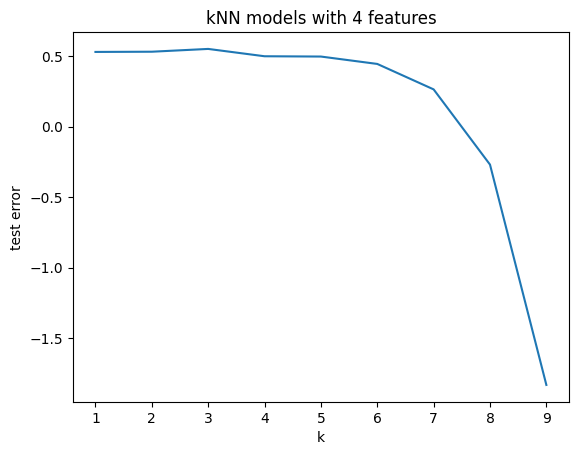

In [ ]:
(df_cv_results_["mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", title = "kNN models with 4 features")